# Import Modules

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Defining global variables

In [86]:
# V1 Base URL
global_url_v1_modules = "https://registry.terraform.io/v1/modules"
global_url_v1_provider = "https://registry.terraform.io/v1/providers"

# V2 Base URL
global_url_v2_modules = "https://registry.terraform.io/v2/modules"
global_url_v2_provider = "https://registry.terraform.io/v2/providers"

# GitHub Repository URL for Providers
global_url_github_provider_aws = "hashicorp/terraform-provider-aws"
global_url_github_provider_azurerm = "hashicorp/terraform-provider-azurerm"
global_url_github_provider_google = "hashicorp/terraform-provider-google"

global_url_github_api = "https://api.github.com"

# General functions

In [ ]:
# Get JSON data from URL
def get_json_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data

In [ ]:
def v1_get_pagination(url):
    data = get_json_data(url)
    return data['meta']

In [ ]:
def get_pagination_v1_from_json(data):
    return data['meta']

In [ ]:
# Returns from the given URL the pagination data from JSON
def v2_get_pagination(url):
    data = get_json_data(url)
    return data['meta']['pagination']

In [ ]:
def v1_next_offset_from_url(url):
    meta_data = v1_get_pagination(url)
    return meta_data['next_offset']

In [ ]:
def next_offset_from_json(data):
    return data['next_offset']

In [ ]:
# NOTE: Please use number+=15
def get_page_v1(url, number):
    url = url + "?offset=" + str(number)
    response = requests.get(url)
    data = json.loads(response.text)
    return data

get_page_v1(global_url_v1_modules, 0)

# Providers

## Provider functions

In [83]:
get_json_data(global_url_v2_provider + "/aws")

{'errors': ['not found']}

## Provider Visualization

In [ ]:
print(v2_get_pagination(global_url_v2_provider))

# Modules

## Module functions

In [ ]:
def v1_get_modules_from_provider(url, provider):
    local_list_modules = []
    # set start URL
    url = url + "?provider=" + str(provider)
    while True:
        # get JSON data from URL
        data = get_json_data(url)

        # get meta data header from current URL
        page_meta_data = get_pagination_v1_from_json(data)

        # if there is a next offset, get the modules
        if "next_offset" in page_meta_data:
            # get the next offset from loaded meta data
            next_offset = next_offset_from_json(page_meta_data)

            # append the modules to the local list
            for module in data['modules']:
                local_list_modules.append(module)

            # update the url with the next offset
            url = global_url_v1_modules + "?provider=" + str(provider) + "&offset=" + str(next_offset)
        # if there is no next offset, break the loop
        else:
            # attend the displayed modules in the last page too
            for module in data['modules']:
                local_list_modules.append(module)

            break
            
    return local_list_modules   

In [ ]:
def get_modules_v2(url, pages):
    local_list_modules = []
    for i in range(pages):
        url_page = url + "?page%5Bnumber%5D=" + str(i+1) + "&page%5Bsize%5D=15"
        data = get_json_data(url_page)
        print(i)
        # convert json data to list
        for item in data['data']:
            local_list_modules.append(item)

    return local_list_modules

## Visualization

In [154]:
len(v1_get_modules_from_provider(global_url_v1_modules, "oci"))

104

### AWS

### GCP

### Azure

# GitHub metrics

In [126]:
json_data_aws = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_aws)
json_data_gcp = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_google)
json_data_azure = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_azurerm)

In [146]:
df = pd.DataFrame()
df = df.append(json_data_aws, ignore_index=True)
df = df.append(json_data_azure, ignore_index=True)
df = df.append(json_data_gcp, ignore_index=True)

/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_87162/50462718.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_aws, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_87162/50462718.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_azure, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_87162/50462718.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_gcp, ignore_index=True)


## Visualization

<AxesSubplot:xlabel='name'>

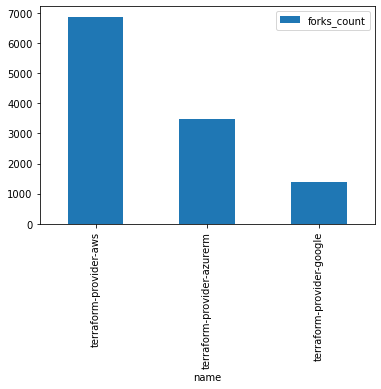

In [148]:
df.plot(x='name', y='forks_count', kind='bar')

<AxesSubplot:xlabel='name'>

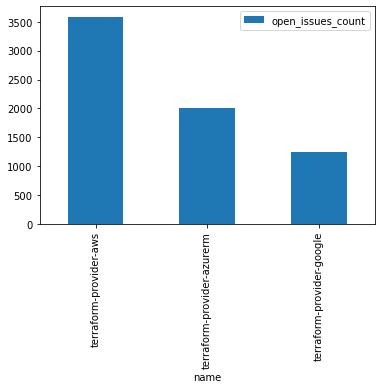

In [149]:
df.plot(x='name', y='open_issues_count', kind='bar')

<AxesSubplot:xlabel='name'>

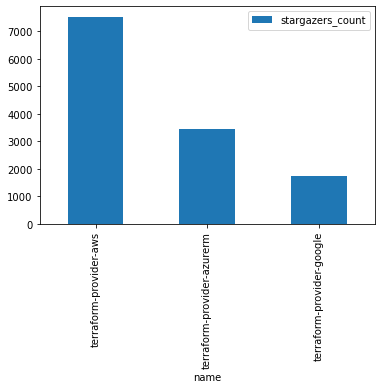

In [150]:
df.plot(x='name', y='stargazers_count', kind='bar')